# Explore the Data
This notebook performs and exploratory data analysis for the loan prediction problem

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style(style='darkgrid')

from sklearn.feature_selection import RFECV, VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
#from ml_metrics import quadratic_weighted_kappa
random_state = 42

In [2]:
# Import the data
train_dataset = pd.read_csv("../data/loan-default-prediction/train_v2.csv")
test_dataset = pd.read_csv("../data/loan-default-prediction/test_v2.csv")


/var/folders/h7/7vg9jm5s5nnc4n3hx5fzwhrr0000gn/T/ipykernel_73707/661819634.py:2: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  train_dataset = pd.read_csv("../data/loan-default-prediction/train_v2.csv")
/var/folders/h7/7vg9jm5s5nnc4n3hx5fzwhrr0000gn/T/ipykernel_73707/661819634.py:3: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  test_dataset = pd.read_csv("../data/loan-default-prediction/test_v2.csv")


In [3]:
# Take a glimpse of the data
train_dataset.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [4]:
# Separate the target variable and 
features_df = train_dataset.drop(columns=['loss'], axis=1)
target_variable = train_dataset.loss

In [5]:
print ('Features: %s'%(str(features_df)))
print ('-----------------------------------')
print ('Target Variable: %s'%(str(target_variable)))

Features:             id   f1  f2        f3    f4  f5     f6      f7      f8      f9  \
0            1  126  10  0.686842  1100   3  13699  7201.0  4949.0  126.75   
1            2  121  10  0.782776  1100   3  84645   240.0  1625.0  123.52   
2            3  126  10  0.500080  1100   3  83607  1800.0  1527.0  127.76   
3            4  134  10  0.439874  1100   3  82642  7542.0  1730.0  132.94   
4            5  109   9  0.502749  2900   4  79124    89.0   491.0  122.72   
...        ...  ...  ..       ...   ...  ..    ...     ...     ...     ...   
105466  105467  126   8  0.006620  2200   4  76831   331.0  2366.0  125.25   
105467  105468  137   9  0.358568  2200   4   9836  3898.0  1106.0  135.88   
105468  105469  129   9  0.241858  2200   4    627  7081.0  6577.0  128.44   
105469  105470  129   9  0.569719  2200   4  14629  4984.0  2101.0  127.25   
105470  105471  129   9  0.407707  2200   4    627  8173.0  6578.0  128.66   

        ...   f769  f770  f771  f772  f773    f774   

In [6]:
len(list(features_df.columns))

770

In [8]:
# Let's also drop columns that have a lot of null values, they won't add into the analysis
features_df = features_df.dropna(thresh=len(features_df) * 0.7, axis=1)  # Keep columns with at least 70% non-null values

In [9]:
# Select numerical columns
numerical_columns = features_df.select_dtypes(include=['int', 'float'])

# Select categorical columns
categorical_columns = features_df.select_dtypes(include=['object', 'category'])

print("Numerical Columns:")
print(numerical_columns.columns.tolist())

print("\nCategorical Columns:")
print(categorical_columns.columns.tolist())


Numerical Columns:
['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f139', 

In [10]:
# Fill with the mean with the numerical columns
for nc in numerical_columns:
    features_df[nc] = features_df[nc].fillna(features_df[nc].mean())

In [11]:
# Fill with the mode for the categorical columns
for cc in categorical_columns:
    features_df[cc] = features_df[cc].fillna(features_df[cc].mode())

In [14]:
# Transform the categorical columns into numeric ones
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame 'df' with categorical columns
categorical_columns = features_df.select_dtypes(include=['object', 'category'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    features_df[column] = label_encoder.fit_transform(features_df[column].astype(str))


In [17]:

# Combine transformed features and target variable
data_for_training = pd.concat([features_df, target_variable], axis=1)

X = data_for_training.iloc[:, :-1]  # Features (all columns except the last one)
y = data_for_training.iloc[:, -1]   # Target variable (last column)


In [22]:
y

0         0
1         0
2         0
3         0
4         0
         ..
105466    0
105467    0
105468    0
105469    0
105470    0
Name: loss, Length: 105471, dtype: int64

========== LinearRegression ==========
Mean Squared Error in training: 16.73168935992306
Mean Squared Error in validation: 18.36610202340605
Show top 10 important features:


,feature_importance,ranking
f528,0.000379,1.0
f670,0.000239,2.0
f273,0.000129,3.0
f778,0.000122,4.0
f689,0.000118,5.0
f332,0.000105,6.0
f691,0.000081,7.0
f414,0.000061,8.0
f339,0.000061,9.0
f421,0.000047,10.0


/var/folders/h7/7vg9jm5s5nnc4n3hx5fzwhrr0000gn/T/ipykernel_73707/852858816.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)


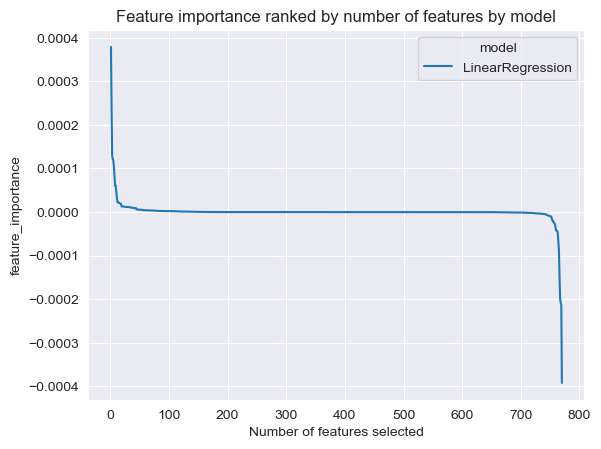

========== ExtraTreesRegressor ==========
Mean Squared Error in training: 17.514864266416197
Mean Squared Error in validation: 18.931168349452296
Show top 10 important features:


,feature_importance,ranking
f776,0.315472,1.0
f674,0.066225,2.0
f734,0.031686,3.0
f738,0.030153,4.0
f432,0.029582,5.0
f420,0.017931,6.0
f69,0.015873,7.0
f70,0.013244,8.0
f765,0.010855,9.0
f684,0.009052,10.0


/var/folders/h7/7vg9jm5s5nnc4n3hx5fzwhrr0000gn/T/ipykernel_73707/852858816.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)


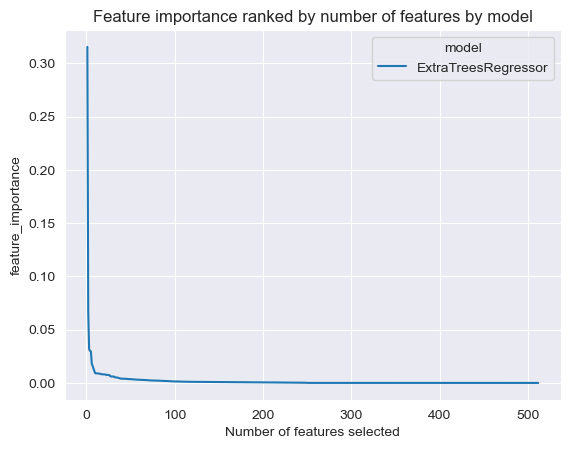

========== RandomForestRegressor ==========
Mean Squared Error in training: 17.523978504492003
Mean Squared Error in validation: 18.920435658114602
Show top 10 important features:


,feature_importance,ranking
f674,0.200461,1.0
f670,0.095309,2.0
f640,0.080397,3.0
f738,0.059674,4.0
f628,0.043618,5.0
f663,0.033688,6.0
f740,0.033588,7.0
f397,0.032184,8.0
f346,0.029899,9.0
f694,0.029000,10.0


/var/folders/h7/7vg9jm5s5nnc4n3hx5fzwhrr0000gn/T/ipykernel_73707/852858816.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)


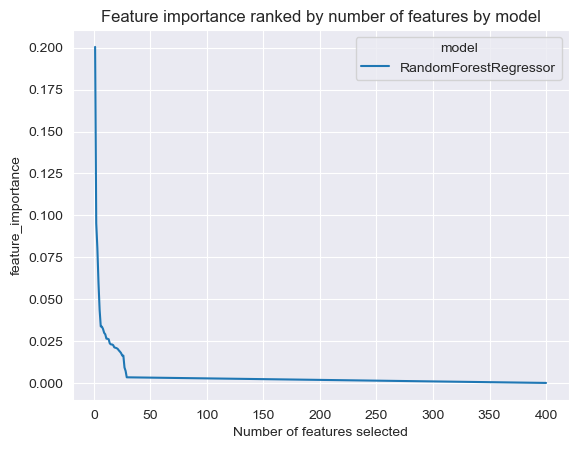

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

X_train2_sup = X.copy()

X_model, X_valid, y_model, y_valid = train_test_split(X_train2_sup, y, random_state=random_state, test_size=.8)

model_dict = {
    'LinearRegression': LinearRegression(n_jobs=-1),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=200, max_depth=3, min_samples_leaf=.06, n_jobs=-1, random_state=random_state),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=20, max_depth=2, min_samples_leaf=.1, random_state=random_state, n_jobs=-1)
}

estimator_dict = {}
importance_features_sorted_all = pd.DataFrame()

for model_name, model in model_dict.items():
    print('='*10, model_name, '='*10)
    model.fit(X_model, y_model)
    y_model_pred = model.predict(X_model)
    y_valid_pred = model.predict(X_valid)
    
    print('Mean Squared Error in training:', mean_squared_error(y_model, y_model_pred))
    print('Mean Squared Error in validation:', mean_squared_error(y_valid, y_valid_pred))
    
    importance_values = model.coef_ if model_name == 'LinearRegression' else model.feature_importances_
    importance_features_sorted = pd.DataFrame(importance_values.reshape([-1, len(X_train2_sup.columns)]), columns=X_train2_sup.columns).mean(axis=0).sort_values(ascending=False).to_frame()
    importance_features_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
    importance_features_sorted['ranking'] = importance_features_sorted['feature_importance'].rank(ascending=False)
    importance_features_sorted['model'] = model_name
    
    print('Show top 10 important features:')
    display(importance_features_sorted.drop('model', axis=1).head(10))
    
    importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)
    estimator_dict[model_name] = model

    # Reset index before plotting
    # importance_features_sorted_all_reset = importance_features_sorted_all.reset_index(drop=True)


    plt.title('Feature importance ranked by number of features by model')
    sns.lineplot(data=importance_features_sorted, x='ranking', y='feature_importance', hue='model')
    plt.xlabel("Number of features selected")
    plt.show()


,feature_importance,ranking,model
f528,0.000379,1.0,LinearRegression
f670,0.000239,2.0,LinearRegression
f273,0.000129,3.0,LinearRegression
f778,0.000122,4.0,LinearRegression
f689,0.000118,5.0,LinearRegression
...,...,...,...
f262,0.000000,400.0,RandomForestRegressor
f263,0.000000,400.0,RandomForestRegressor
f264,0.000000,400.0,RandomForestRegressor
f265,0.000000,400.0,RandomForestRegressor


In [34]:
# Select the top n features for a specific model
selected_model = "LinearRegression"
number_of_features = 60

# Filter the DataFrame by the specified model
selected_features_by_model = importance_features_sorted_all[importance_features_sorted_all['model'] == selected_model]

# Select the top n features based on the ranking
selected_features_by_model = selected_features_by_model.nsmallest(number_of_features, 'ranking')['feature_importance'].index.tolist()



/Users/josemedardotapiatellez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

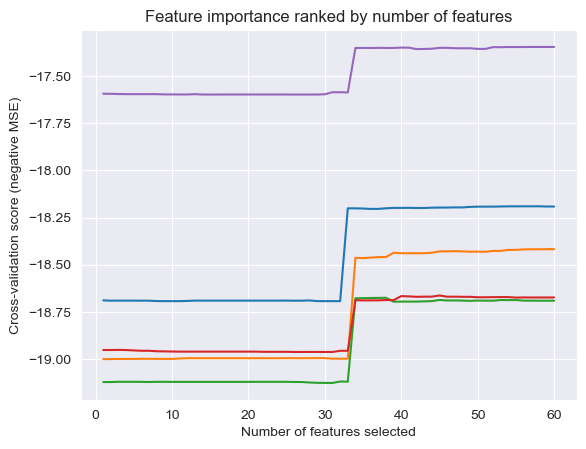

In [38]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Assuming you have X_train2_sup, selected_features_by_model, and y

# Create an instance of KFold for cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Initialize RFECV with the chosen regression model and cross-validation
rfecv = RFECV(estimator=regressor, step=1, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
rfecv.fit(X_train2_sup[selected_features_by_model], y)

plt.figure()
plt.title('Feature importance ranked by number of features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (negative MSE)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.plot(rfecv.n_features_, rfecv.grid_scores_[rfecv.n_features_-1], marker='o', label='Optimal number of features')
plt.legend(loc='best')
plt.show()

